# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

/Users/estebanquintanillaiii/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?APPID=c433171dbebbe70851a85f882cfa8642"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | adjumani
Processing Record 5 of Set 1 | kattivakkam
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | chibougamau
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | san francisco tlalcilalcalpan
Processing Record 12 of Set 1 | kailua-kona
Processing Record 13 of Set 1 | amungan
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | wanxian
Processing Record 16 of Set 1 | sao vicente
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | santa elena de uairen
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | lazaro cardenas
Processing Record 21 of Set 1 | hamilton
Processing Record 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arteche,12.2645,125.4048,303.95,63,100,3.23,PH,1715649997
1,eggesin,53.6833,14.0833,286.27,76,11,4.11,DE,1715649997
2,montagu,-40.7667,144.9667,287.12,54,47,5.98,AU,1715649998
3,berlin,52.5244,13.4105,288.19,51,0,4.12,DE,1715649728
4,blackmans bay,-43.0167,147.3167,285.66,61,100,1.79,AU,1715649998


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("Output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arteche,12.2645,125.4048,303.95,63,100,3.23,PH,1715649997
1,eggesin,53.6833,14.0833,286.27,76,11,4.11,DE,1715649997
2,montagu,-40.7667,144.9667,287.12,54,47,5.98,AU,1715649998
3,berlin,52.5244,13.4105,288.19,51,0,4.12,DE,1715649728
4,blackmans bay,-43.0167,147.3167,285.66,61,100,1.79,AU,1715649998


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

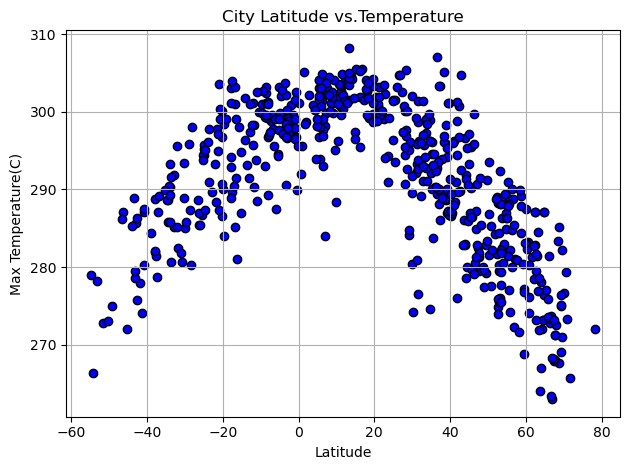

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature')
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("Output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

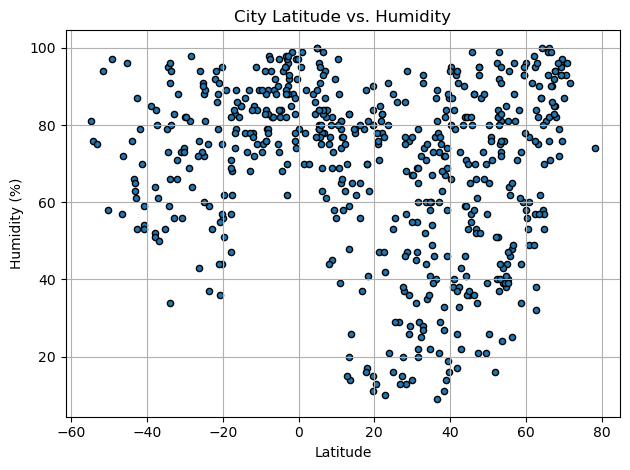

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

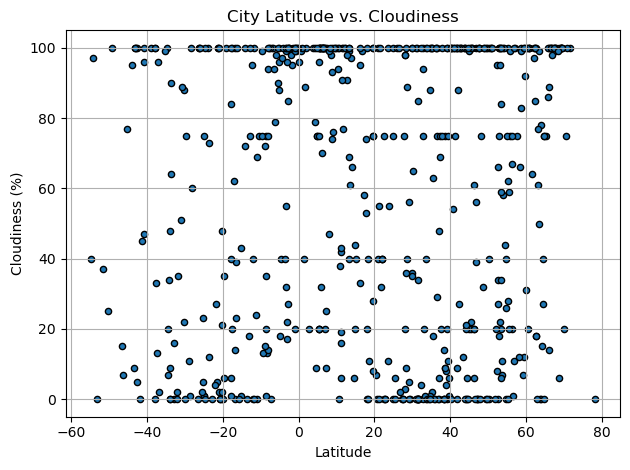

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

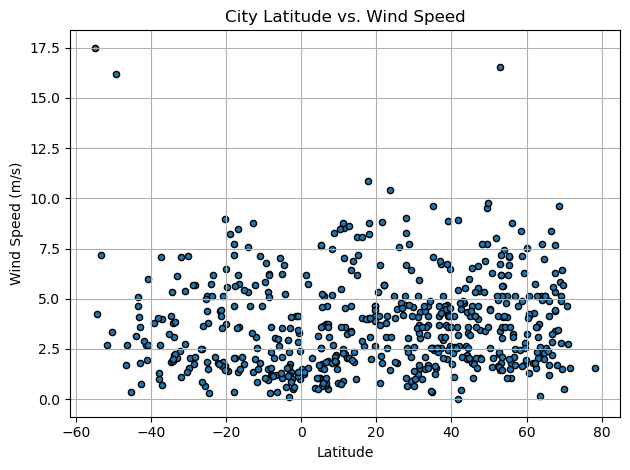

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arteche,12.2645,125.4048,303.95,63,100,3.23,PH,1715649997
1,eggesin,53.6833,14.0833,286.27,76,11,4.11,DE,1715649997
3,berlin,52.5244,13.4105,288.19,51,0,4.12,DE,1715649728
6,yuzhno-sakhalinsk,46.9581,142.7337,284.94,66,100,4.00,RU,1715649999
8,mil'kovo,55.6078,37.7956,277.07,64,59,1.49,RU,1715650000


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,montagu,-40.7667,144.9667,287.12,54,47,5.98,AU,1715649998
4,blackmans bay,-43.0167,147.3167,285.66,61,100,1.79,AU,1715649998
5,san antonio de pale,-1.4014,5.6325,299.64,88,100,4.13,GQ,1715649999
7,puerto ayora,-0.7393,-90.3518,296.79,97,99,2.84,EC,1715649999
13,flying fish cove,-10.4217,105.6791,299.97,89,75,4.63,CX,1715650001


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.82


Text(0, 0.5, 'Temperature(C)')

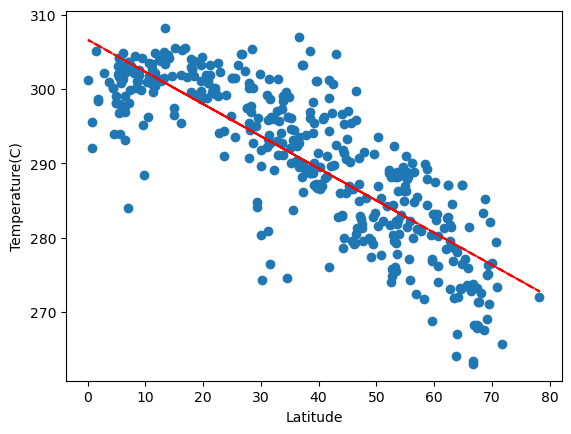

In [28]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.78


Text(0, 0.5, 'Temperature(C)')

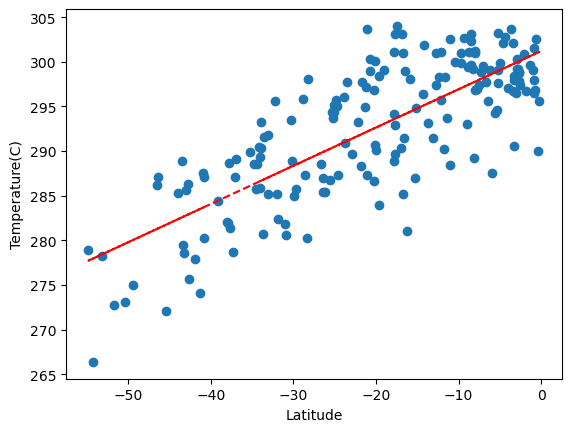

In [29]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 15))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.05


Text(0, 0.5, 'Humidity(%)')

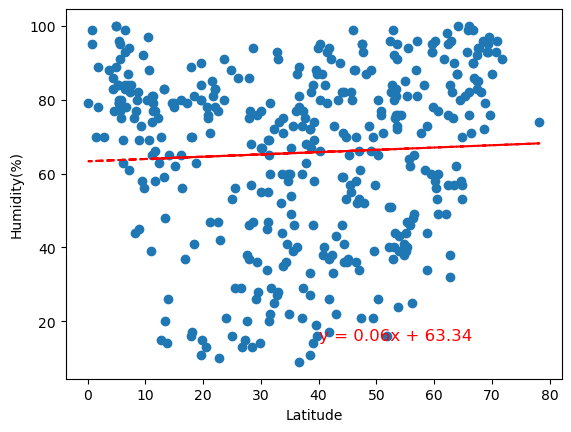

In [30]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(40, 15))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.38


Text(0, 0.5, 'Humidity(%)')

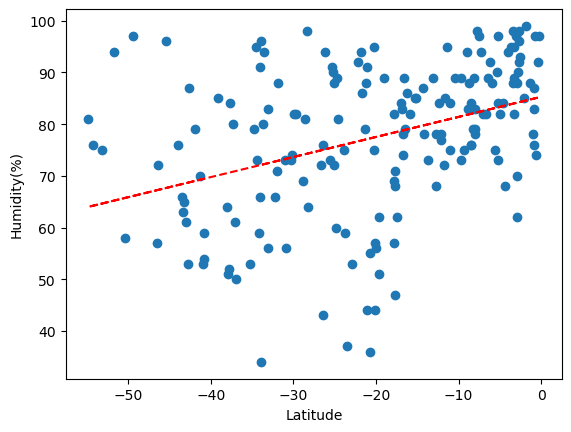

In [31]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is -0.0


Text(0, 0.5, 'Cloudiness(%)')

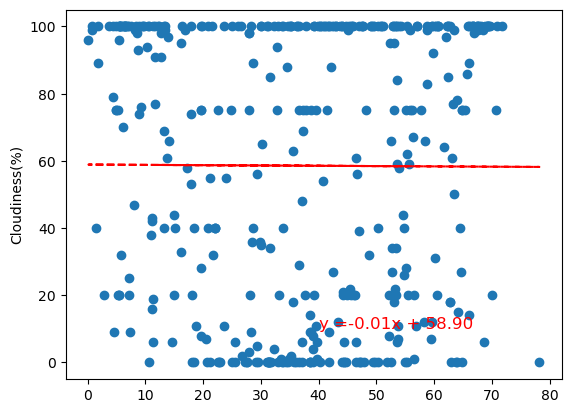

In [32]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(40,10)) 
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is 0.21


Text(0, 0.5, 'Cloudiness(%)')

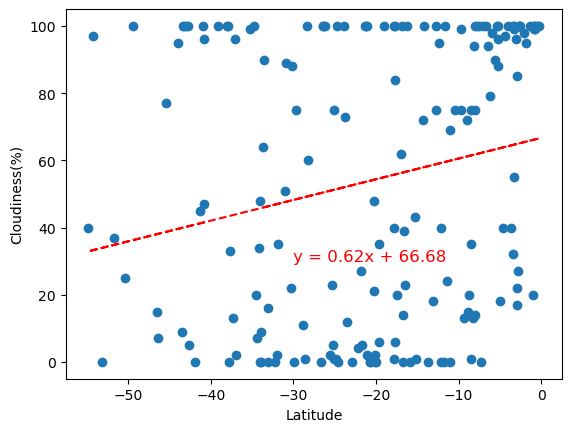

In [33]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-30, 30))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.08


Text(0, 0.5, 'Wind Speed(m/s)')

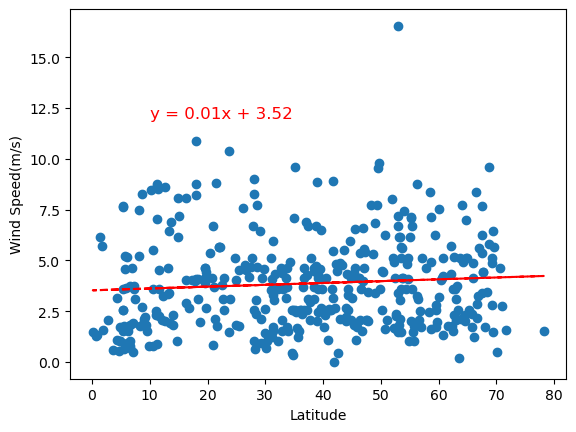

In [34]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.22


Text(0, 0.5, 'Wind Speed(m/s)')

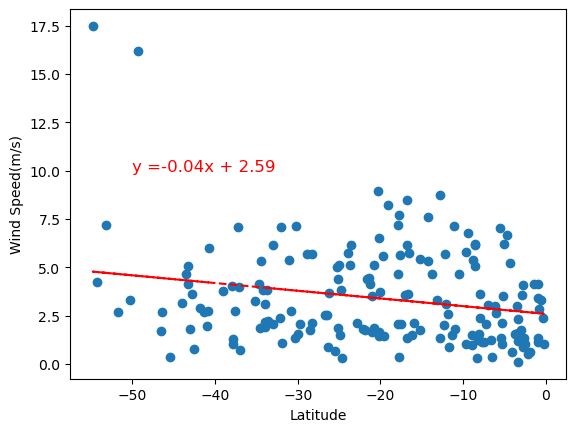

In [35]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE